<a href="https://colab.research.google.com/github/huong-liz04/customer_churn_analyst/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In reality, for product companies, customer churn is a challenging issue that requires in-depth analysis to identify why customers stop using the company's products or services and to devise retention strategies. Description of the fields of data is as follows:
- Customerid: A unique ID that identifies each customer.
- Gender: The customer’s gender: Male, Female
- Age: The customer’s current age
- SeniorCitizen: Indicates if the customer is 65 or older: Yes, No
- Married: Indicates if the customer is married: Yes, No
- NumberOfDependents: Indicates the number of dependents that live with the customer.
- Country: The country of the customer’s primary residence
- State: The state of the customer’s primary residence.
- City: The city of the customer’s primary residence.
- Latitude: The latitude of the customer’s primary residence.
- Longitude: The longitude of the customer’s primary residence.
- NumberOfReferrals: Indicates the number of referrals to date that the customer has made.
- TenureInMonths: Indicates the total amount of months that the customer has been with the company by the end of the quarter
- AvgMonthlyLongDistanceCharges: Indicates the customer’s average long distance charges, calculated to the end of the quarter.
- MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- InternetType: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- AvgMonthlyGbDownload: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- MonthlyCharge: Indicates the customer’s current total monthly charge for all their services from the company.
- TotalCharges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- TotalRefunds: Indicates the customer’s total refunds, calculated to the end of the quarter specified above.
- TotalExtraDataCharges: Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- TotalLongDistanceCharges: Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.
- TotalRevenue: Indicates the customer’s total revenue in quarter
- SatisfactionScore: A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
- ChurnLabel: Yes = the customer left the company this quarter. No = the customer remained with the company.
- ChurnScore: A value from 0-100. The higher the score, the more likely the customer will churn.
- CLTV: Customer Lifetime Value. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- ChurnCategory: A high-level category for the customer’s reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving.



# 0.&nbsp;Prepare

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
np.set_printoptions(precision=4, suppress=True)
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use(['seaborn-v0_8', 'seaborn-v0_8-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
dfTelco = pd.read_csv("https://raw.githubusercontent.com/hungpq7/data-chilly/main/data/telco_churn_customer.csv")
dfTelco.head()

,Customerid,Gender,Age,SeniorCitizen,Married,NumberOfDependents,Country,State,City,Latitude,Longitude,NumberOfReferrals,TenureInMonths,AvgMonthlyLongDistanceCharges,MultipleLines,InternetService,InternetType,AvgMonthlyGbDownload,Contract,PaymentMethod,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,ChurnLabel,ChurnScore,Cltv,ChurnCategory
0,8779-QRDMV,Male,78,Yes,No,0,United States,California,Los Angeles,34.023810,-118.156582,0,1,0.00,No,Yes,DSL,8,Month-to-Month,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Yes,91,5433,Competitor
1,7495-OOKFY,Female,74,Yes,Yes,1,United States,California,Los Angeles,34.044271,-118.185237,1,8,48.85,Yes,Yes,Fiber Optic,17,Month-to-Month,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Yes,69,5302,Competitor
2,1658-BYGOY,Male,71,Yes,No,3,United States,California,Los Angeles,34.108833,-118.229715,0,18,11.33,Yes,Yes,Fiber Optic,52,Month-to-Month,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Yes,81,3179,Competitor
3,4598-XLKNJ,Female,78,Yes,Yes,1,United States,California,Inglewood,33.936291,-118.332639,1,25,19.76,No,Yes,Fiber Optic,12,Month-to-Month,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Yes,88,5337,Dissatisfaction
4,4846-WHAFZ,Female,80,Yes,Yes,1,United States,California,Whittier,33.972119,-118.020188,1,37,6.33,Yes,Yes,Fiber Optic,14,Month-to-Month,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Yes,67,2793,Price


In [5]:
dfTelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customerid                     7043 non-null   object 
 1   Gender                         7043 non-null   object 
 2   Age                            7043 non-null   int64  
 3   SeniorCitizen                  7043 non-null   object 
 4   Married                        7043 non-null   object 
 5   NumberOfDependents             7043 non-null   int64  
 6   Country                        7043 non-null   object 
 7   State                          7043 non-null   object 
 8   City                           7043 non-null   object 
 9   Latitude                       7043 non-null   float64
 10  Longitude                      7043 non-null   float64
 11  NumberOfReferrals              7043 non-null   int64  
 12  TenureInMonths                 7043 non-null   i

Demographic:
- Gender
- Age
- Married
- NumberOfDependents

Geographic:
- Country
- State
- City
- Latitude
- Longitude

Services:
- TenureInMonths
- NumberOfReferrals
- MultipleLines
- InternetType
- Contract
- PaymentMethod
- SatisfactionScore

Charges:
- AvgMonthlyGbDownload
- AvgMonthlyLongDistanceCharges
- MonthlyCharge
- TotalCharges
- TotalRefunds
- TotalExtraDataCharges
- TotalLongDistanceCharges
- TotalRevenue
- CLTV

Churn:
- ChurnScore
- ChurnLabel
- ChurnCategory

# 1.&nbsp;Is the data valid?
- All customer are in California, USA: Yes.
- Check whether the column `SeniorCitizen` is compatible with column `Age`: Yes.
- Check whether `AvgMonthlyLongDistanceCharges = TotalLongDistanceCharges / TenureInMonths`: Yes.
- Check whether `MonthlyCharge = TotalCharges / TenureInMonths`: No.
- Check whether `TotalRevenue = TotalCharges - TotalRefunds`: Yes.


In [9]:
dfTelco[['Country', 'State']].value_counts().rename('Count').reset_index()

,Country,State,Count
0,United States,California,7043


In [10]:
dfTelco.groupby('SeniorCitizen')['Age'].agg([min, max]).reset_index()

<ipython-input-10-4dc6a9f8cb8f>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dfTelco.groupby('SeniorCitizen')['Age'].agg([min, max]).reset_index()
<ipython-input-10-4dc6a9f8cb8f>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dfTelco.groupby('SeniorCitizen')['Age'].agg([min, max]).reset_index()


,SeniorCitizen,min,max
0,No,19,64
1,Yes,65,80


In [19]:
diff = dfTelco['TotalLongDistanceCharges'] / dfTelco['TenureInMonths'] - dfTelco['AvgMonthlyLongDistanceCharges']
diff.abs().max()


7.105427357601002e-15

In [21]:
diff = dfTelco['TotalCharges'] / dfTelco['TenureInMonths'] - dfTelco['MonthlyCharge']
diff.abs().max()

19.125000000000007

In [24]:
diff = (
    dfTelco['TotalRevenue']
    + dfTelco['TotalRefunds']
    - dfTelco['TotalCharges']
    - dfTelco['TotalExtraDataCharges']
    - dfTelco['TotalLongDistanceCharges']
)
diff.abs().max()


1.8189894035458565e-12

In [25]:
def map_binary(x):
    if x.lower() == 'yes': return 1
    elif x.lower() == 'no': return 0
    else: return np.nan

dfTelco = (
    dfTelco
    .eval('AvgMonthlyRevenue = TotalRevenue / TenureInMonths')
    .eval('AvgMonthlyCharges = TotalCharges / TenureInMonths')
    .eval('AvgMonthlyRefunds = TotalRefunds / TenureInMonths')
    .eval('AvgMonthlyExtraDataCharges = TotalExtraDataCharges / TenureInMonths')
    .assign(SeniorCitizen = dfTelco['SeniorCitizen'].map(map_binary))
    .assign(Married = dfTelco['Married'].map(map_binary))
    .assign(MultipleLines = dfTelco['MultipleLines'].map(map_binary))
    .assign(ChurnLabel = dfTelco['ChurnLabel'].map(map_binary))
    .drop(columns=['Country', 'State', 'InternetService'])
)

# 2.&nbsp;Who are our customers?

## 2.1. Demographic
- Same ratio between Male & Female, also being consistent across different ages.
- Same ratio between Married & Not married (surprisingly).
- `Ages < 65` distributes uniformally. `Age > 65` also distributes uniformally, but lower density.

In [26]:
dfTelco[['Gender', 'Married']].value_counts(normalize=True).rename('Ratio').reset_index()

,Gender,Married,Ratio
0,Male,0,0.261394
1,Female,0,0.255573
2,Male,1,0.243362
3,Female,1,0.239671


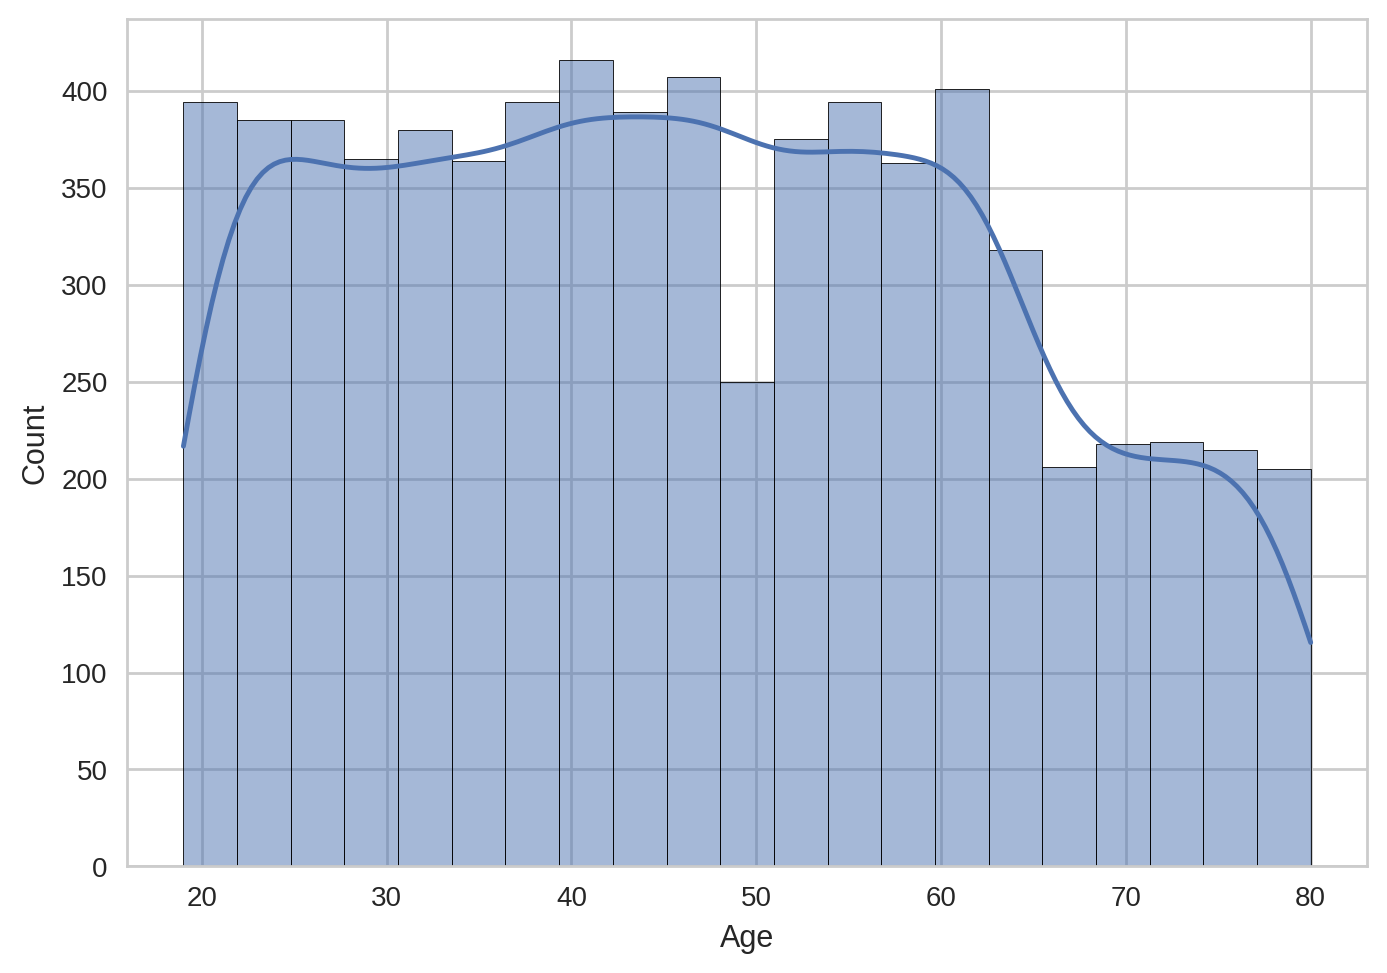

In [27]:
sns.histplot(dfTelco, x='Age', kde=True)
plt.show()

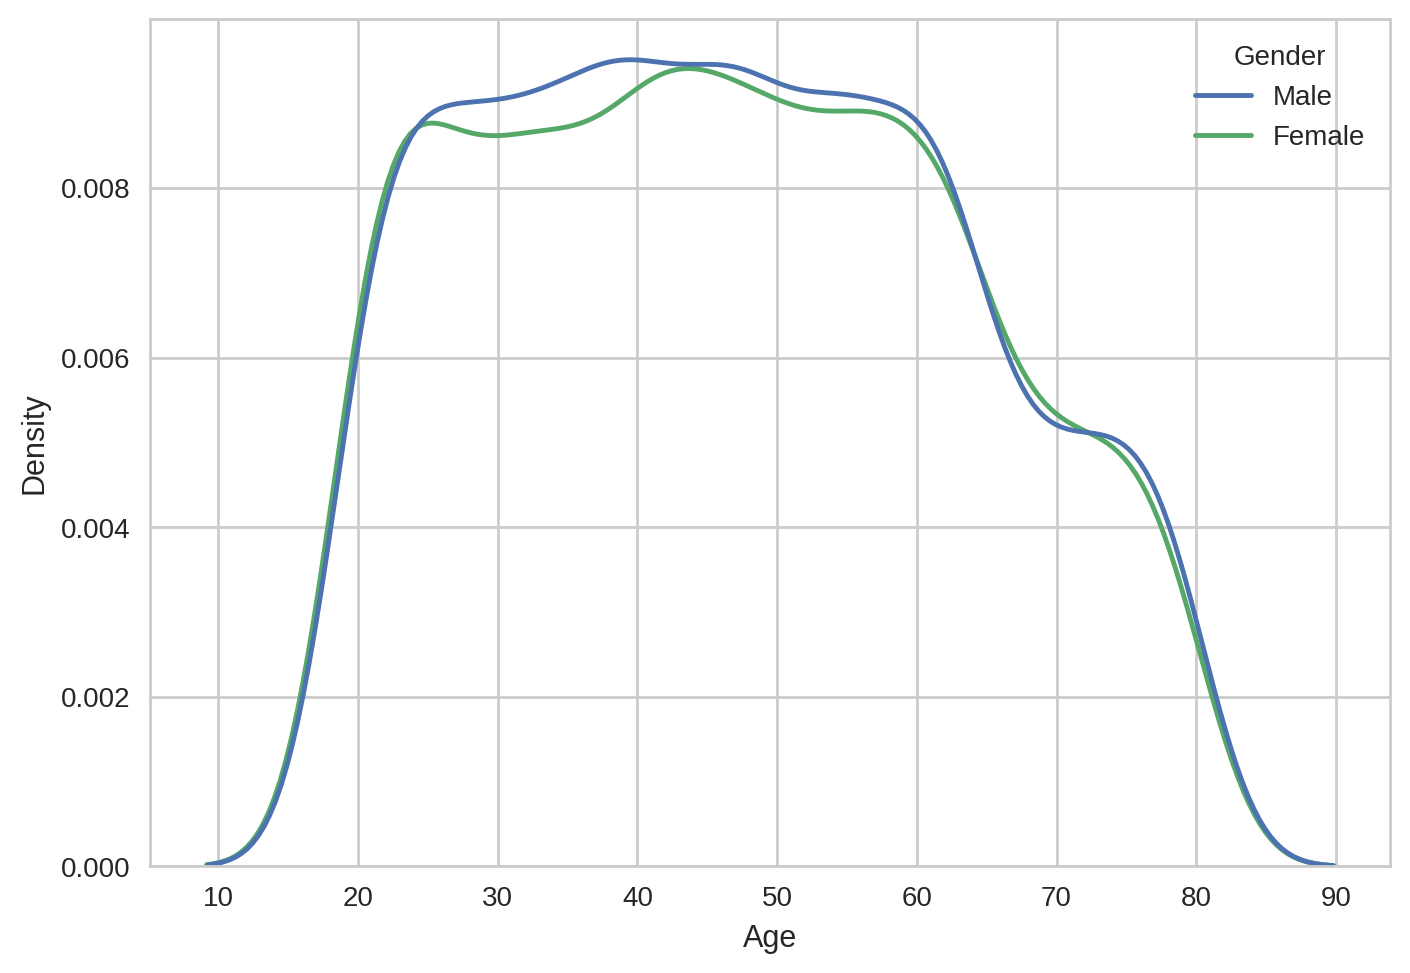

In [28]:
sns.kdeplot(dfTelco, x='Age', hue='Gender')
plt.show()

In [29]:
df = dfTelco['NumberOfDependents'].map(lambda x: x if x < 4 else 'Above 4').value_counts().reset_index()
df.columns = ['NumberOfDependents', 'Count']
df

,NumberOfDependents,Count
0,0,5416
1,1,553
2,2,531
3,3,517
4,Above 4,26


## 2.2. Geographic
- Very high density in **seaside** cities: Los Angeles, San Diego, San Jose, Sacramento and San Francisco.

In [30]:
fig = px.density_mapbox(
    dfTelco,
    lat='Latitude', lon='Longitude',
    radius=5,
    zoom=4,
    color_continuous_scale='Tealgrn',
    mapbox_style="carto-positron"
)

fig.show()

In [31]:
dfTelco['City'].value_counts().head(10)

,count
City,
Los Angeles,293
San Diego,285
San Jose,112
Sacramento,108
San Francisco,104
Fresno,61
Long Beach,60
Oakland,52
Escondido,51


# 3.&nbsp;Customers at our company
- Majority of customers (1) comes from the **early days** of the company and (2) are **newly acquired**.
- Telephone: customers using multiple phones have longer tenure than customers using a single phone.
- The most important customer segment: using both **multiple lines** (telephone) and **fiber optic** (internet): 27% number of customers, contributing 45% total revenue.
- MutiLines customers prefer yearly payment, while FiberOptic customers prefer monthly payment, comparing to the average.

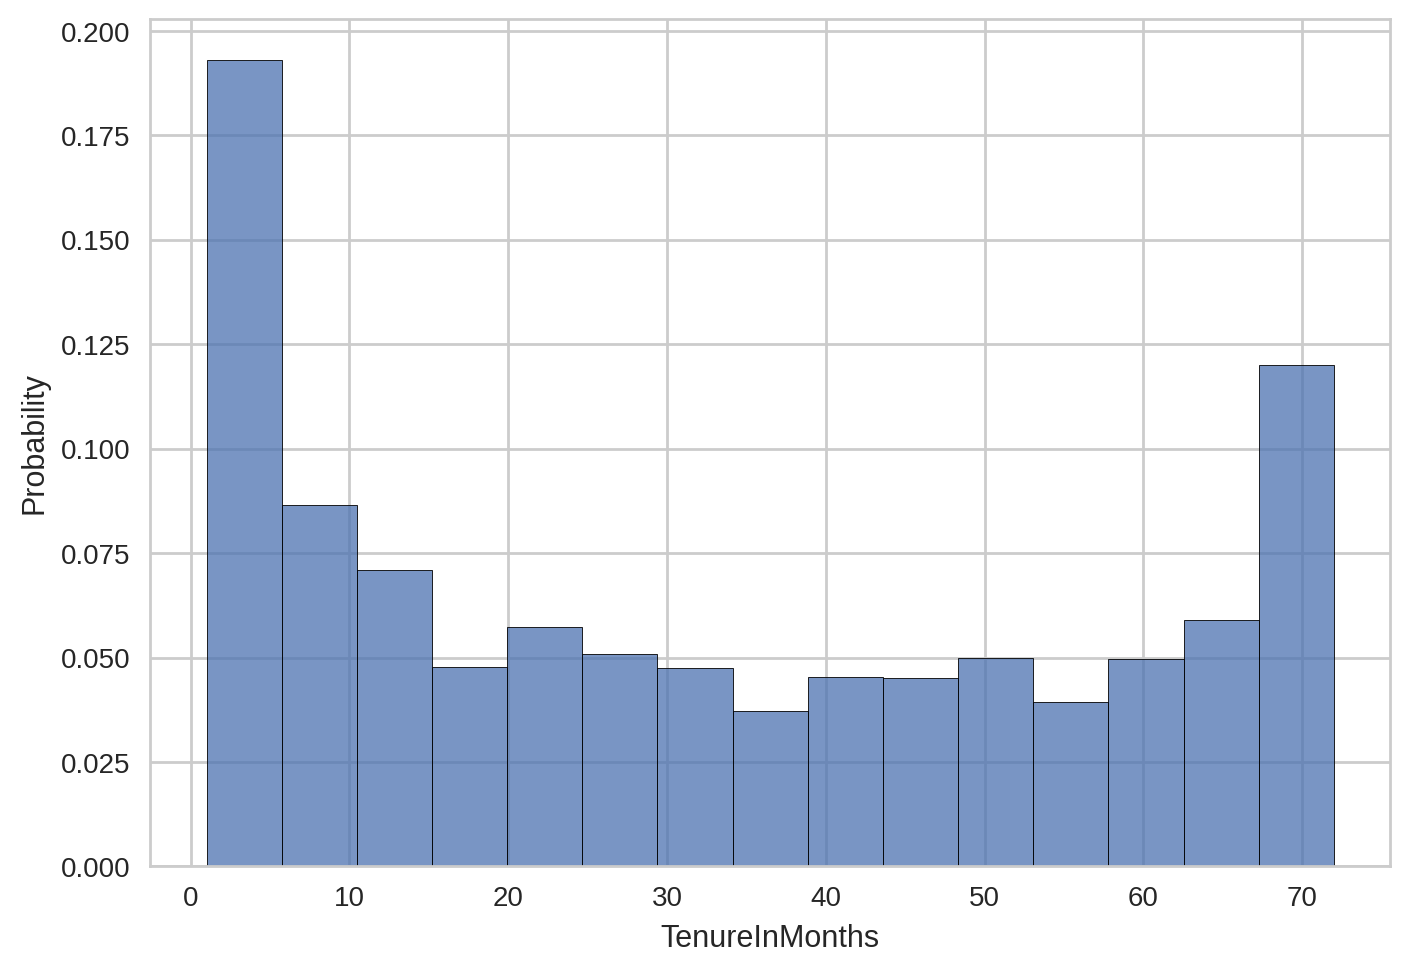

In [32]:
sns.histplot(dfTelco, x='TenureInMonths', stat='probability')
plt.show()

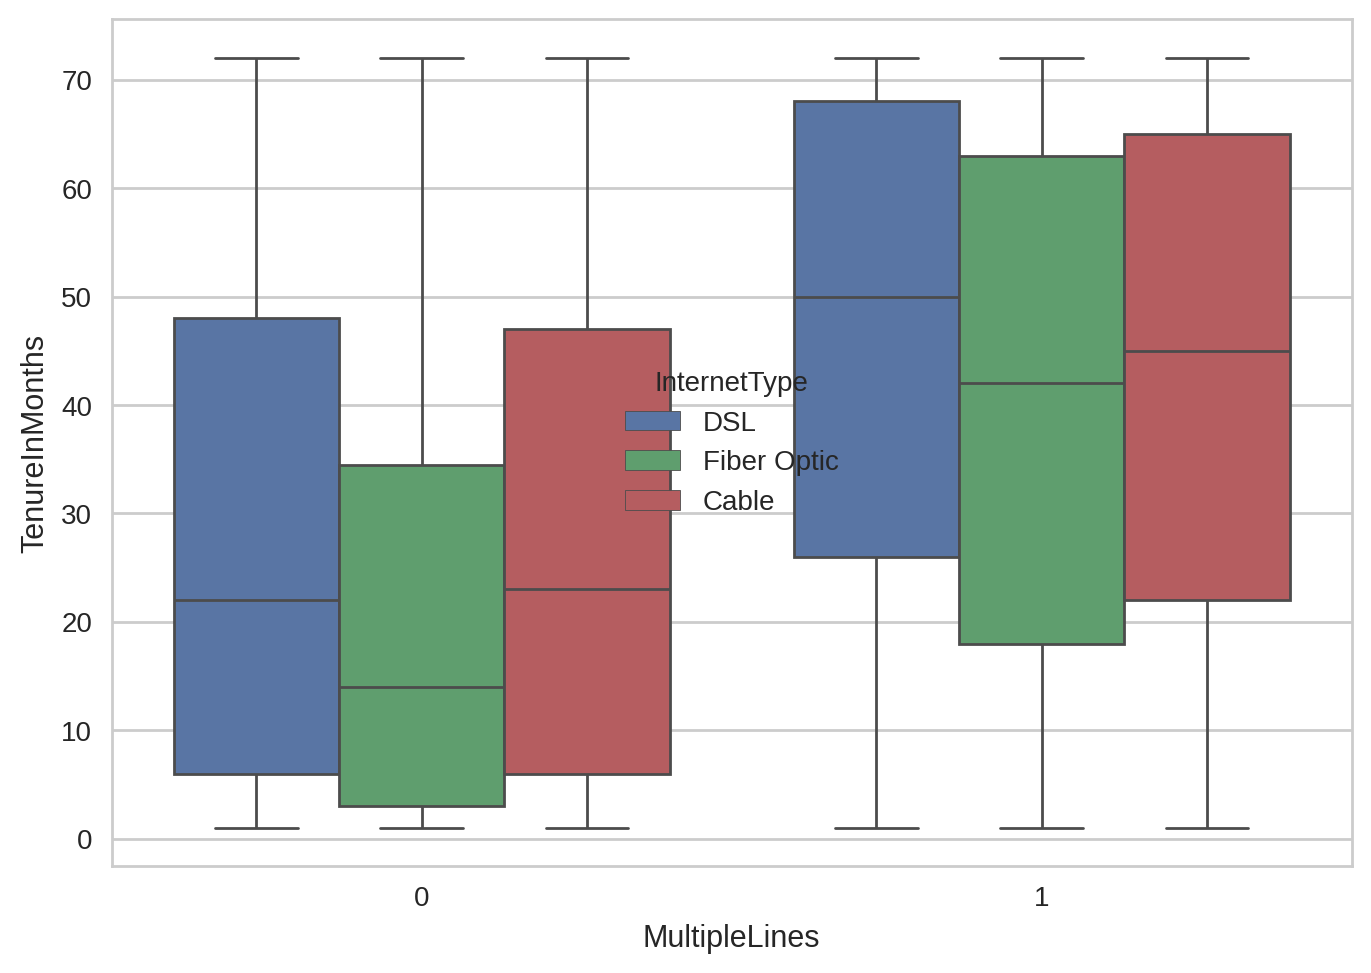

In [33]:
sns.boxplot(dfTelco.query("InternetType != 'None'"), x='MultipleLines', y='TenureInMonths', hue='InternetType')
plt.show()

In [34]:
df = dfTelco.pivot_table(index='MultipleLines', columns='InternetType', values='Customerid', aggfunc=np.size)
df = df / dfTelco.shape[0]
df.style.format('{:.0%}')

InternetType,Cable,DSL,Fiber Optic
MultipleLines,,,
0,8%,17%,16%
1,3%,7%,27%


In [35]:
df = dfTelco.pivot_table(index='MultipleLines', columns='InternetType', values='TotalRevenue', aggfunc=np.sum)
df = df / dfTelco['TotalRevenue'].sum()
df.style.format('{:.0%}')

<ipython-input-35-01782aed503f>:1: FutureWarning:

The provided callable <function sum at 0x7b3fc9f20a40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



InternetType,Cable,DSL,Fiber Optic
MultipleLines,,,
0,6%,11%,13%
1,5%,11%,45%


In [36]:
df = dfTelco.pivot_table(index='Contract', columns='MultipleLines', values='Customerid', aggfunc=np.size)
df /= dfTelco.shape[0]
df.style.format('{:.0%}')

MultipleLines,0,1
Contract,,
Month-to-Month,32%,19%
One Year,13%,9%
Two Year,13%,14%


In [37]:
df = dfTelco.pivot_table(index='Contract', columns='InternetType', values='Customerid', aggfunc=np.size)
df /= dfTelco.shape[0]
df.style.format('{:.0%}')

InternetType,Cable,DSL,Fiber Optic
Contract,,,
Month-to-Month,6%,11%,27%
One Year,3%,6%,8%
Two Year,3%,7%,8%


In [38]:
dfTelco.pivot_table(index='Contract', columns='PaymentMethod', values='Customerid', aggfunc=np.size)

PaymentMethod,Bank Withdrawal,Credit Card,Mailed Check
Contract,,,
Month-to-Month,2240,1136,234
One Year,797,671,82
Two Year,872,942,69


# 4.&nbsp;Customer spendings
- Younger customers tend to use download more.
- Variables about charges are highly correlated with each other, as well as tenure, revenue and CLV.
- Three-fourth revenue comes from subscription, one-fourth comes from long-distance charges.
- Customers' monthly charge distribution: two peaks at around 50 and 110 USD/month. If being asked thresholds which define VIP levels, I would suggest **130 and 75 USD/month**. Why? Because this is equivalent to 1 VIP1, 4 VIP2 and 3 VIP3 for every 8 customers.
- Pareto chart of revenue increases very quickly, then slows down when approaching 100%. It shows that **20% top customers contribute to 50% total revenue** and 40% top customers contribute to 80% total revenue.

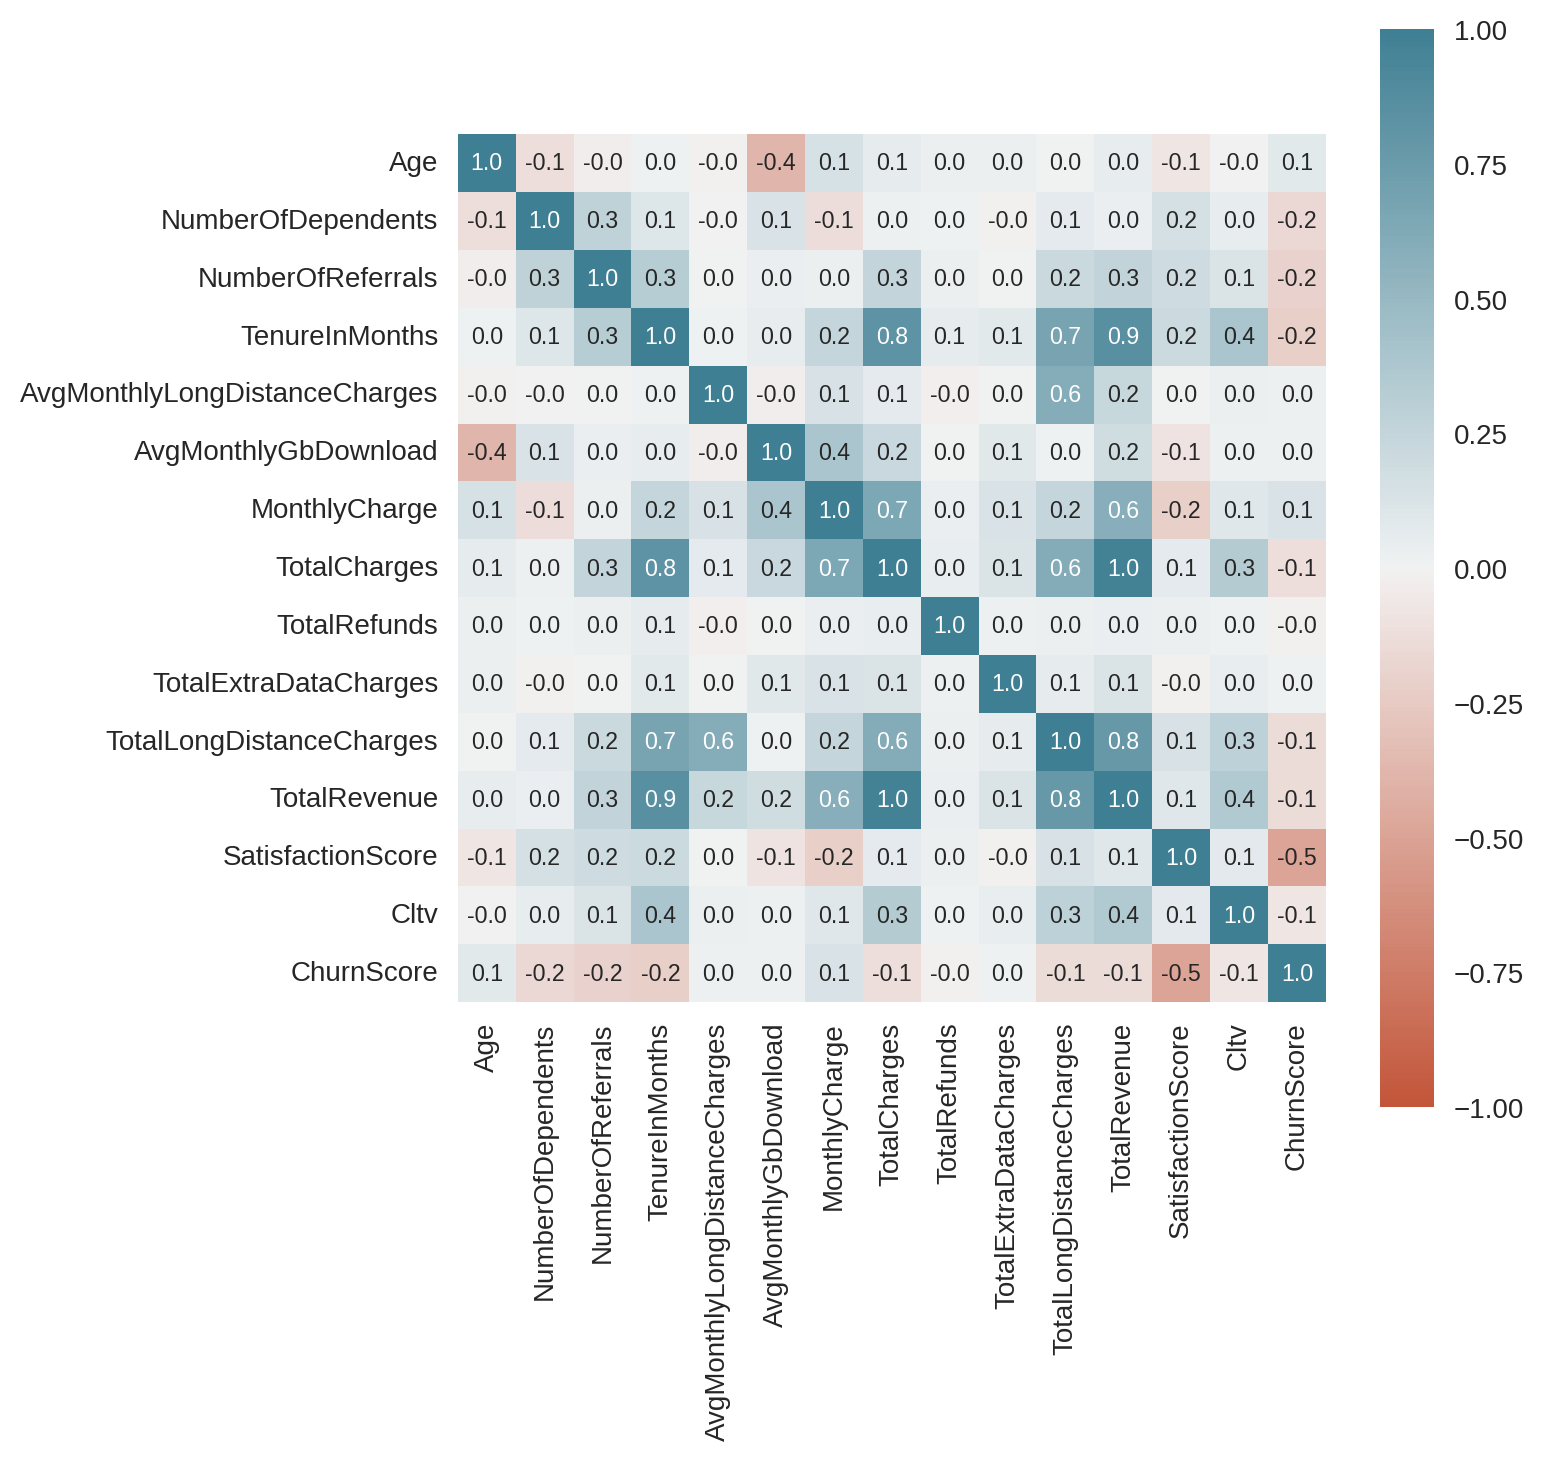

In [41]:
subset = [
    'Age','NumberOfDependents','NumberOfReferrals','TenureInMonths','AvgMonthlyLongDistanceCharges',
    'AvgMonthlyGbDownload','MonthlyCharge','TotalCharges','TotalRefunds','TotalExtraDataCharges',
    'TotalLongDistanceCharges','TotalRevenue','SatisfactionScore','Cltv','ChurnScore'
]

palette = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(7,7))
sns.heatmap(
    dfTelco[subset].corr(),
    square=True, annot=True,
    cmap=palette, fmt='.1f',
    vmin=-1, vmax=1, annot_kws={'fontsize': 'smaller'}
)
plt.show()

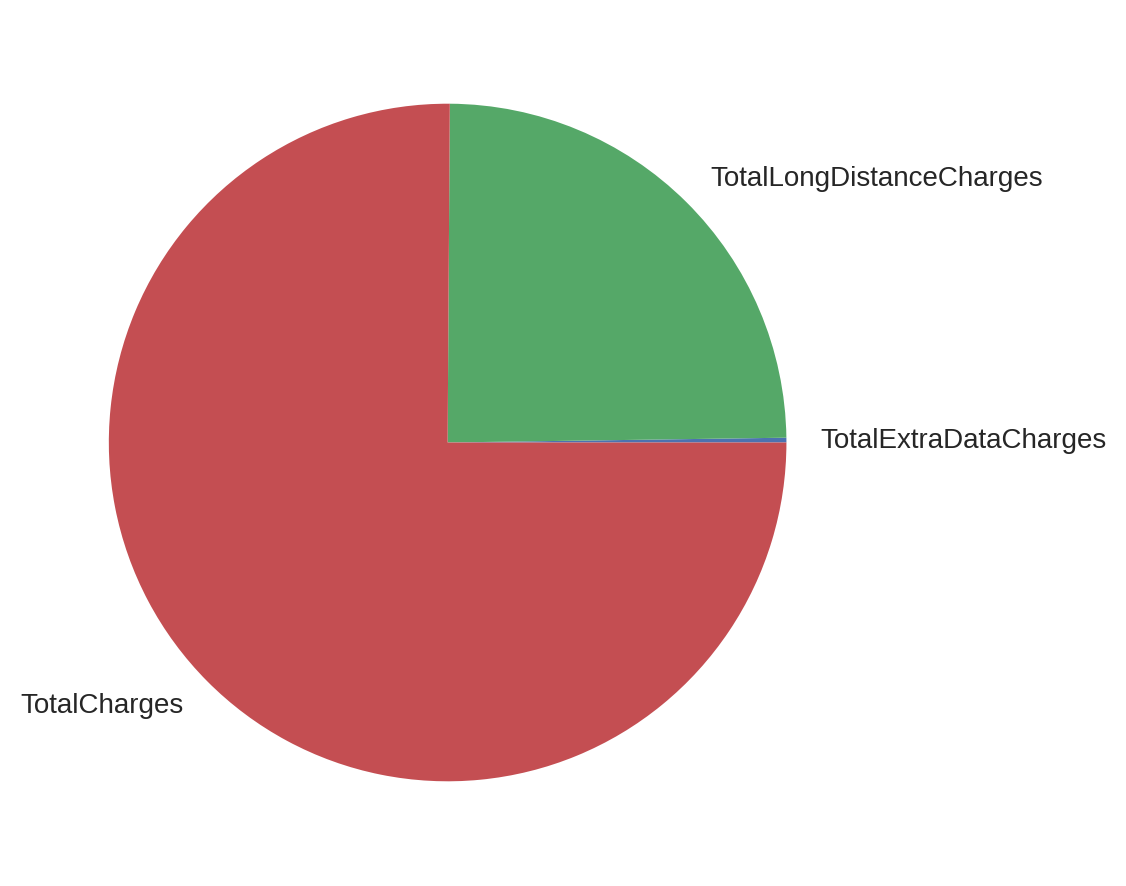

In [42]:
subset = ['TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalCharges']
dfTelco[subset].sum().plot(kind='pie')
plt.show()

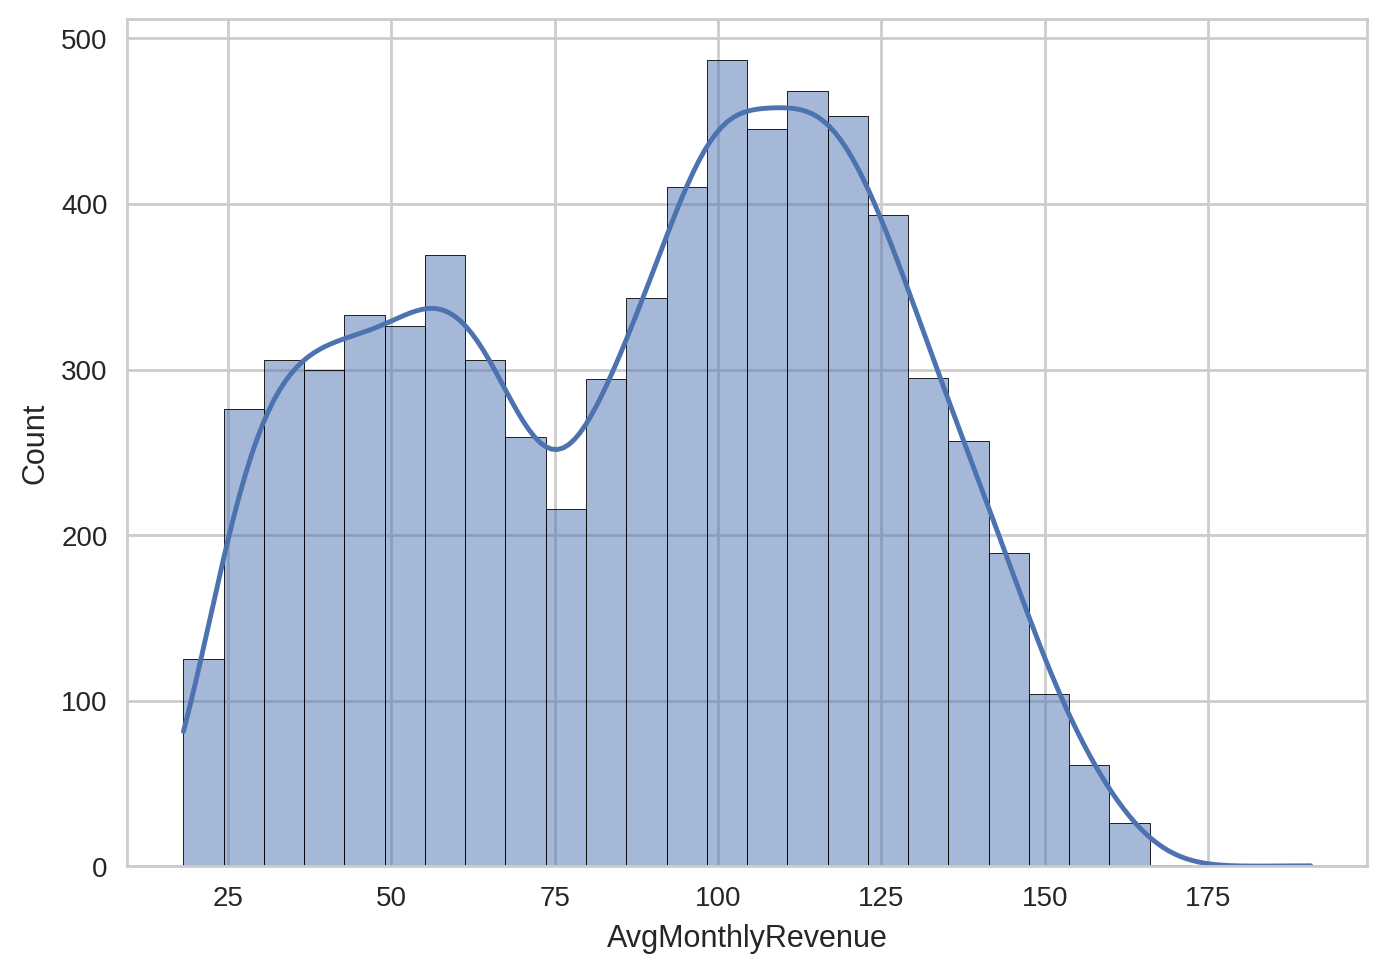

In [43]:
sns.histplot(dfTelco, x='AvgMonthlyRevenue', kde=True)
plt.show()

In [44]:
dfTelco['AvgMonthlyRevenue'].quantile([0.375, 0.875])

,AvgMonthlyRevenue
0.375,75.063291
0.875,130.336745


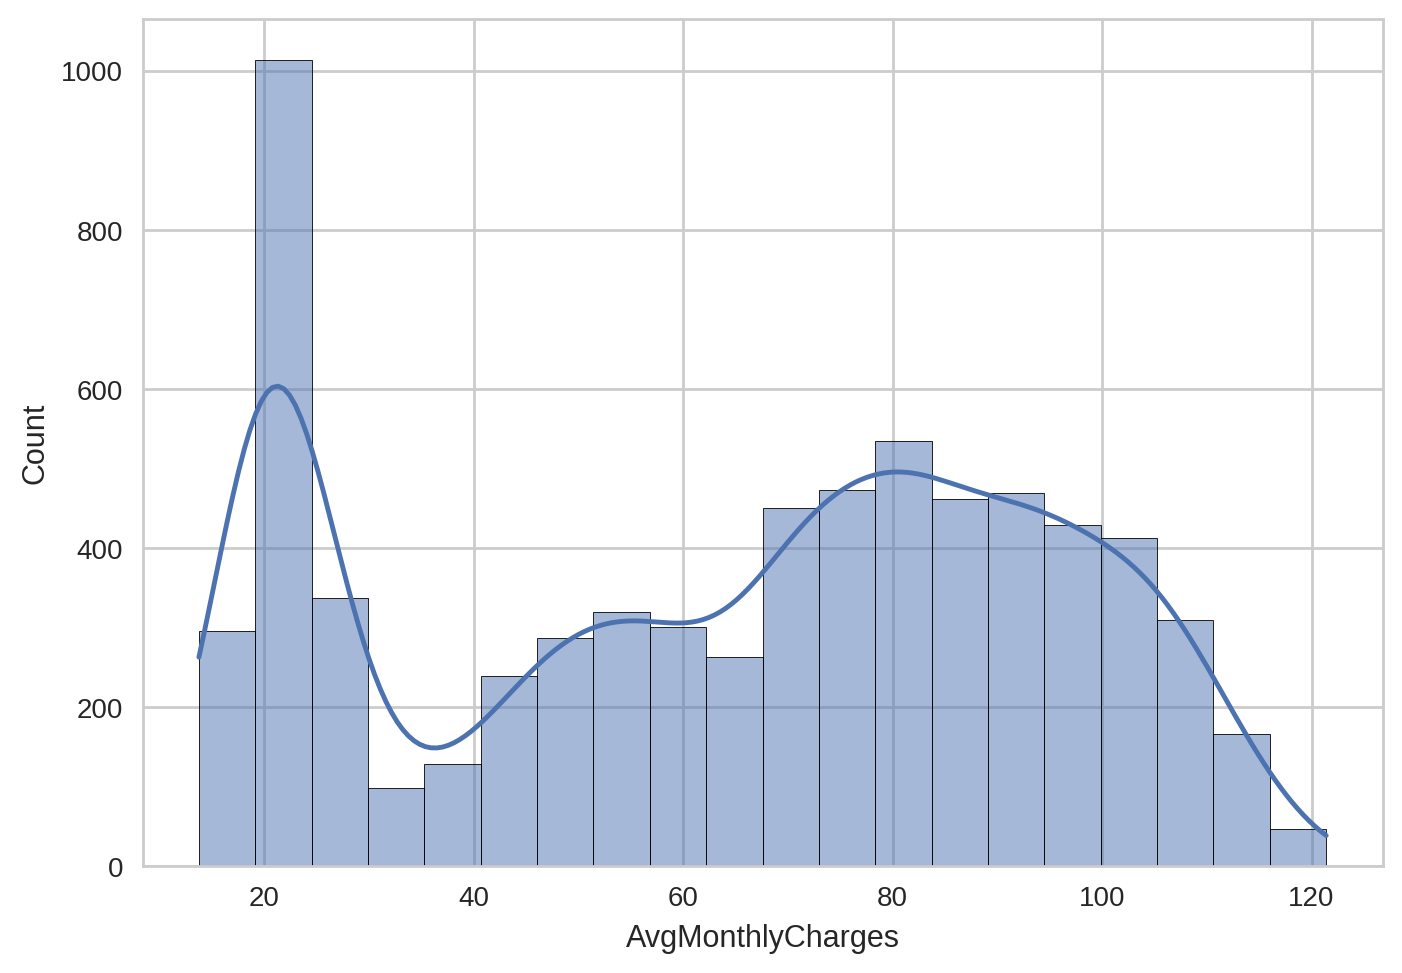

In [45]:
sns.histplot(dfTelco, x='AvgMonthlyCharges', kde=True)
plt.show()

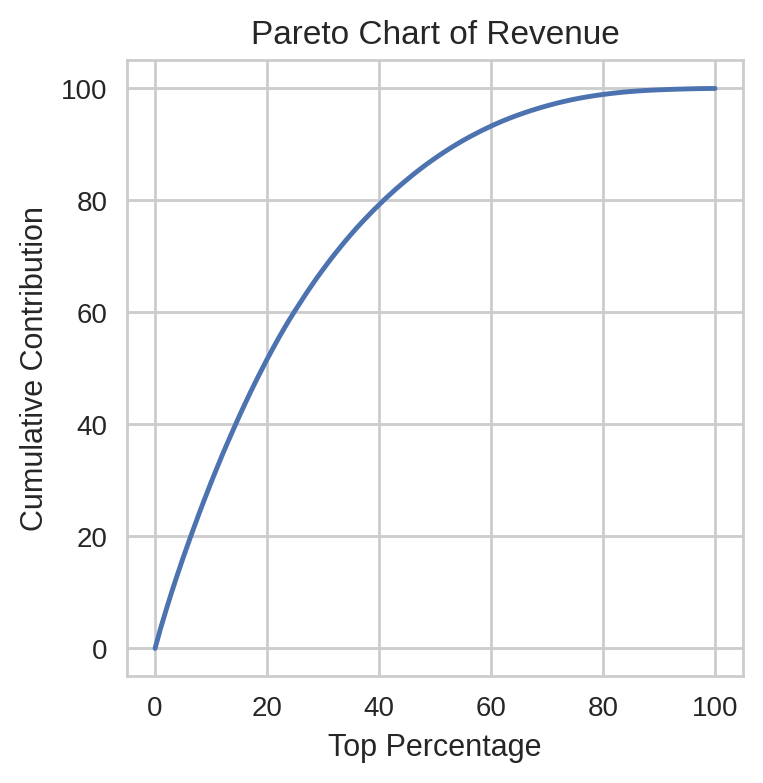

In [46]:
def ParetoChart(series, varname, ax=None):
    series = np.array(series).flatten()
    top_percentage = 100 - pd.qcut(series, 100, np.arange(100)).astype(int)
    df = pd.DataFrame({varname: series, 'top_percentage': top_percentage})
    df = df.groupby('top_percentage')[varname].sum().to_frame().reset_index()
    df = df.assign(cumsum = df[varname].cumsum())
    df = df.assign(pct_contribution = df['cumsum'] / df[varname].sum() * 100)
    df = df[['top_percentage', 'pct_contribution']]
    df.loc[df.shape[0]] = [0, 0]
    df = df.sort_values('top_percentage')

    ax = plt.gca() if ax is None else ax
    ax.plot(df['top_percentage'], df['pct_contribution'])
    ax.axis('scaled')
    ax.set_xlabel('Top Percentage')
    ax.set_ylabel('Cumulative Contribution')
    ax.set_title(f'Pareto Chart of {varname.title()}')
    return ax

fig, ax = plt.subplots(figsize=(4,4))
ParetoChart(dfTelco['TotalRevenue'], 'revenue', ax=ax)
plt.show()

# 5.&nbsp;Churn analysis

## 5.1. Churn state
- Churned customers are more likely to be on a month-to-month contract. Maybe it is **easier to break a monthly contract**?
- Customers with low charges (~20 USD/month) are less likely to churn, while customers with high charges (100-120 USD/month) are more likely to churn. Maybe **our services are too expensive**?
- Older customers are a bit more likely to churn. The difference in average age is only about 3 years.
- Some cities have a significantly high churn rate: San Diego, Fallbrook, Temecula (> 50%).
- Customers who have refered only 0 or 1 person, and customers using Fiber Optic is more likely to churn. On the other hand, customers using a credit card and customers not using internet have a low churn rate.

In [47]:
df = dfTelco['ChurnLabel'].value_counts(normalize=True).reset_index()
df.columns = ['ChurnLabel', 'Percent']
df.style.format({'Percent': '{:.2%}'})

,ChurnLabel,Percent
0,0,73.46%
1,1,26.54%


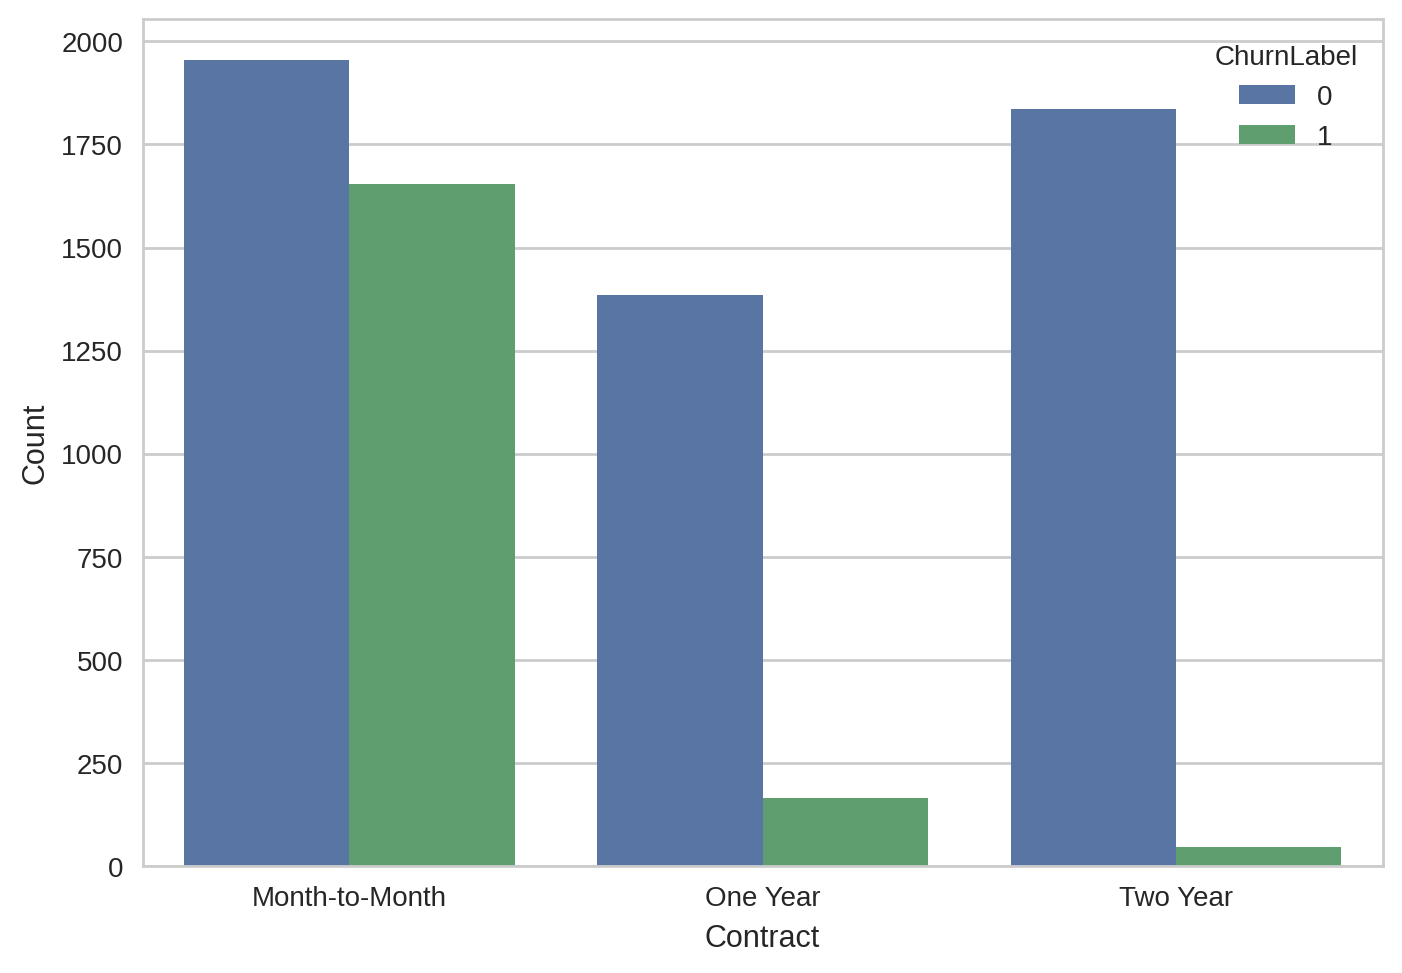

In [48]:
df = dfTelco.groupby(['Contract', 'ChurnLabel']).size().rename('Count').reset_index()
sns.barplot(df, x='Contract', y='Count', hue='ChurnLabel')
plt.show()

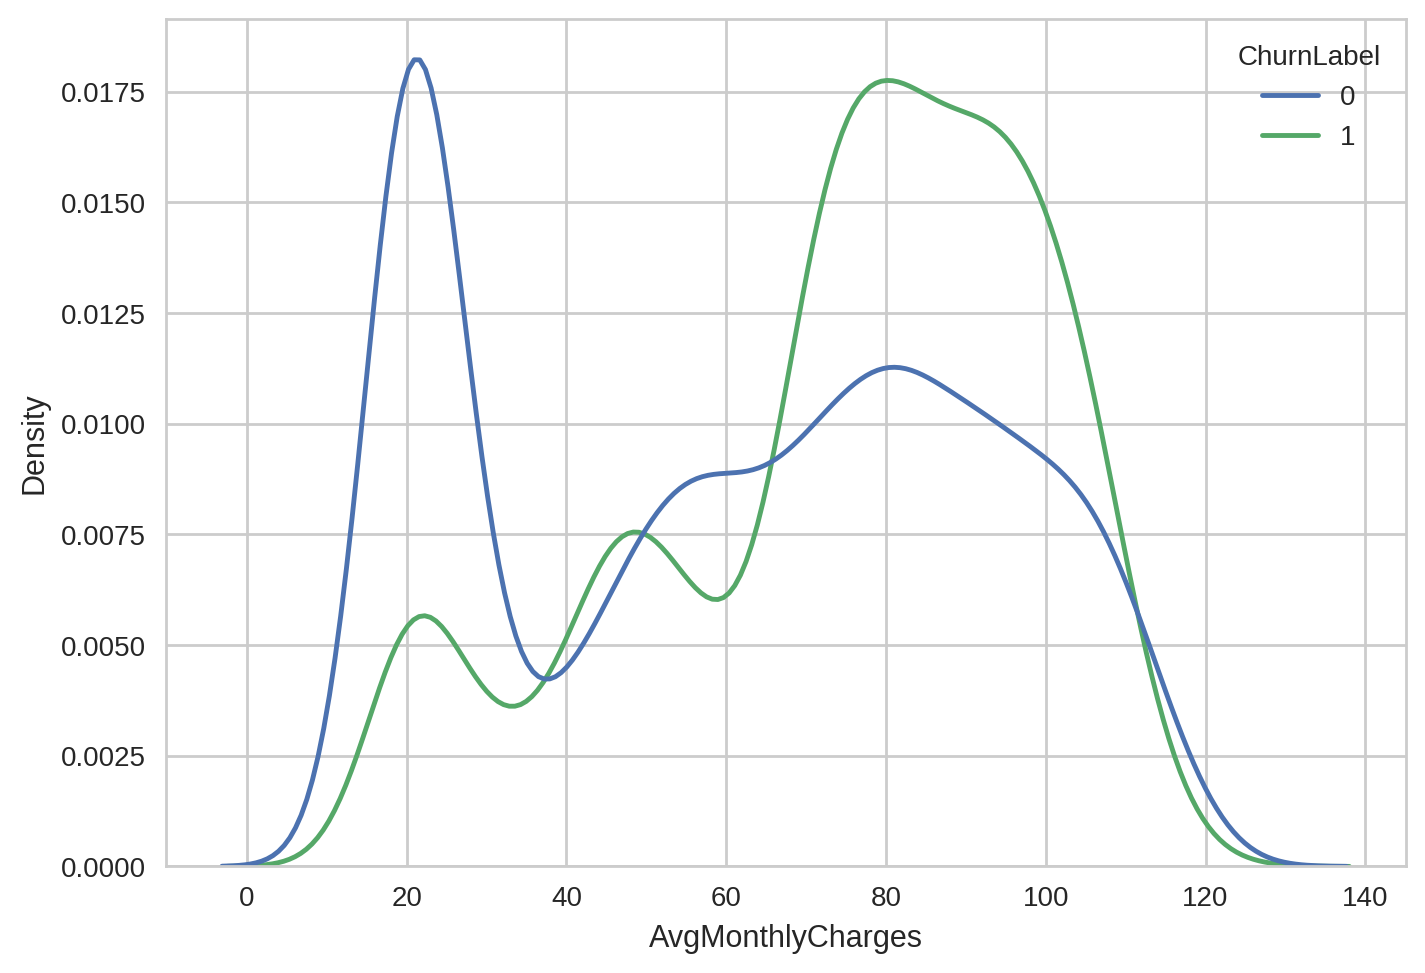

In [49]:
dfTelco['AvgMonthlyCharges'] = dfTelco['TotalCharges'] / dfTelco['TenureInMonths']
sns.kdeplot(dfTelco, x='AvgMonthlyCharges', hue='ChurnLabel', common_norm=False)
plt.show()

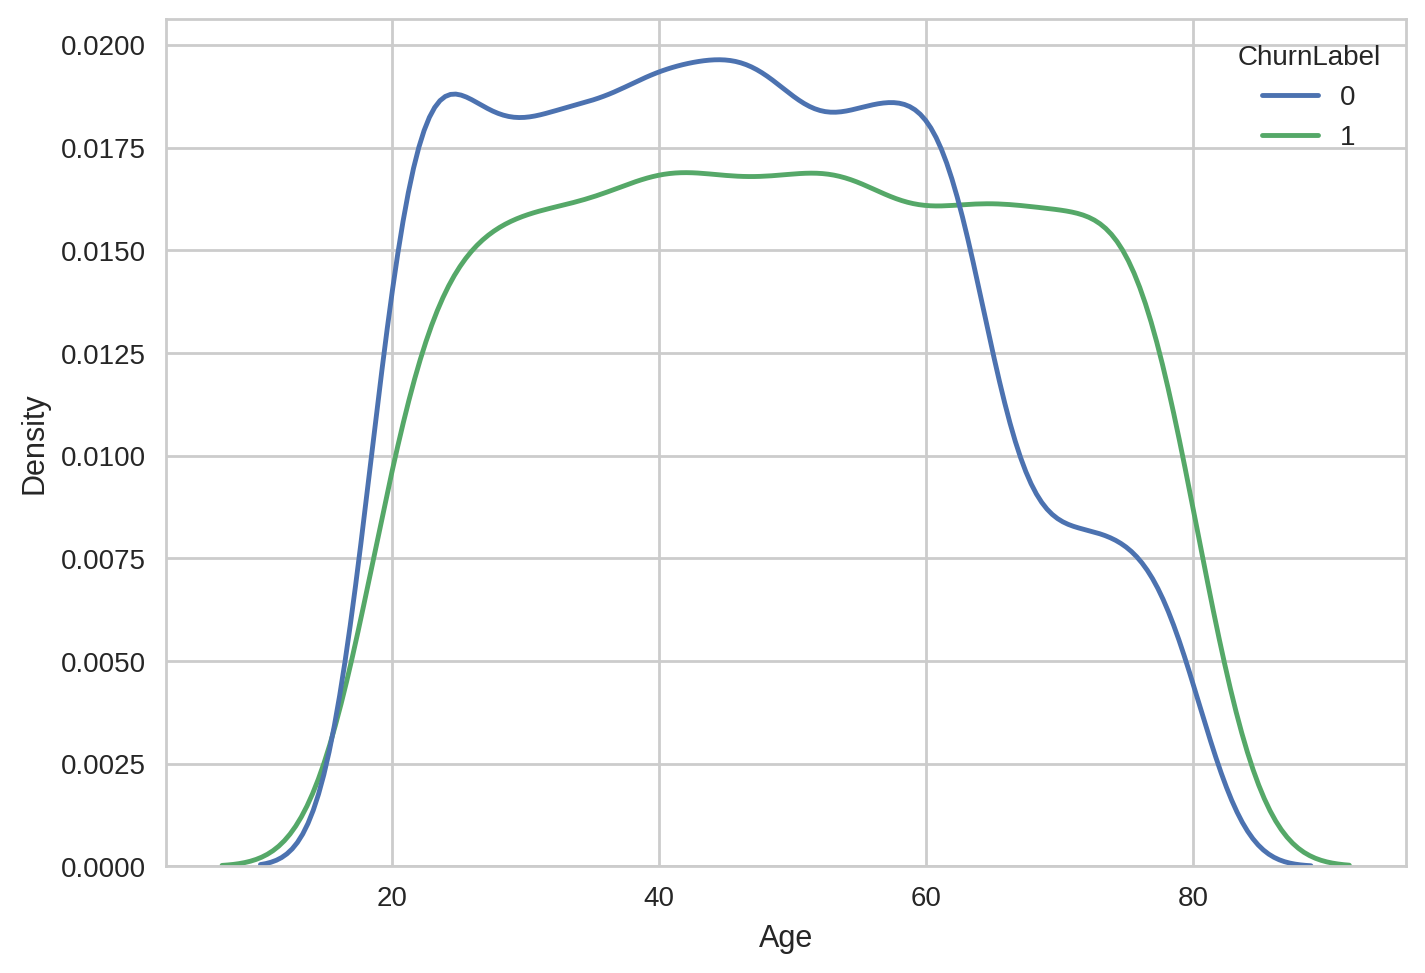

In [50]:
sns.kdeplot(dfTelco, x='Age', hue='ChurnLabel', common_norm=False)
plt.show()

In [51]:
x1 = dfTelco[dfTelco['ChurnLabel']==1]['Age']
x2 = dfTelco[dfTelco['ChurnLabel']==0]['Age']

stats.ttest_ind(x1, x2+3, equal_var=False, alternative='greater')
# accept alternative

TtestResult(statistic=2.9864457990377797, pvalue=0.0014222772994544278, df=3093.1037132585807)

In [52]:
df1 = dfTelco[['City']].value_counts().rename('TotalCount').reset_index()
df2 = dfTelco.query("ChurnLabel==1")[['City']].value_counts().rename('ChurnCount').reset_index()
df = df1.merge(df2, how='left', on='City').fillna(0)
df['ChurnRatio'] = (df['ChurnCount'] + 1) / (df['TotalCount'] + 2)
df.sort_values('ChurnRatio', ascending=False).query('TotalCount >= 20').head(10)

,City,TotalCount,ChurnCount,ChurnRatio
1,San Diego,285,185.0,0.648084
10,Fallbrook,43,26.0,0.600000
13,Temecula,38,22.0,0.575000
28,Santa Rosa,24,11.0,0.461538
32,North Hollywood,20,9.0,0.454545
20,Modesto,28,12.0,0.433333
22,Santa Barbara,28,10.0,0.366667
26,Torrance,25,8.0,0.333333
11,Glendale,40,13.0,0.333333
8,Escondido,51,16.0,0.320755


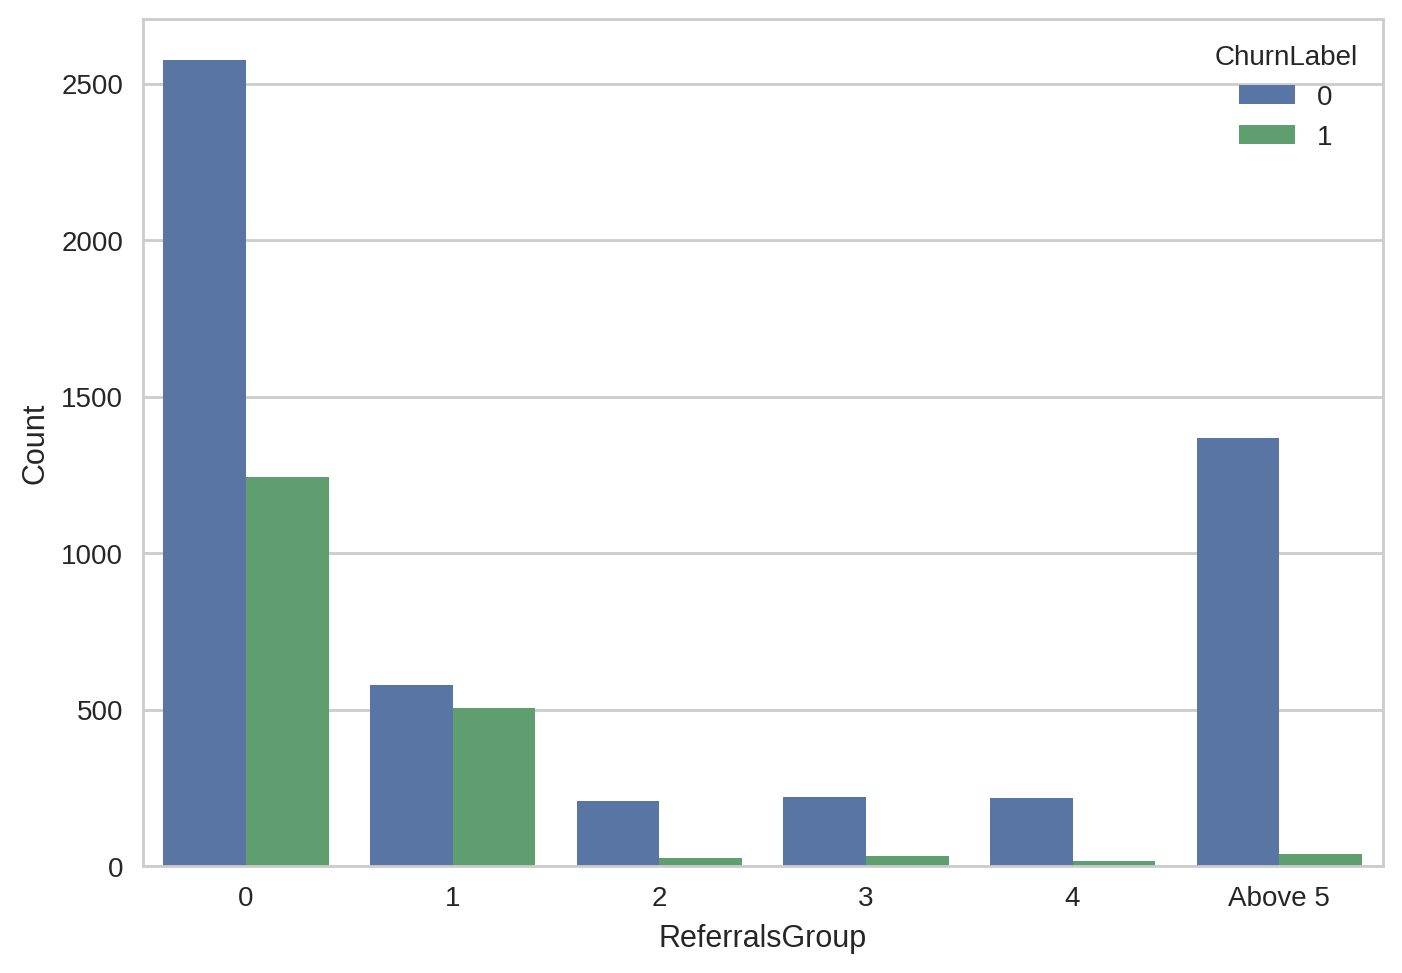

In [53]:
df = dfTelco.assign(ReferralsGroup = dfTelco.NumberOfReferrals.map(lambda x: x if x < 5 else 'Above 5'))
df = df.groupby(['ReferralsGroup', 'ChurnLabel']).size().rename('Count').reset_index()

sns.barplot(df, x='ReferralsGroup', y='Count', hue='ChurnLabel')
plt.show()

<Axes: xlabel='InternetType', ylabel='Count'>

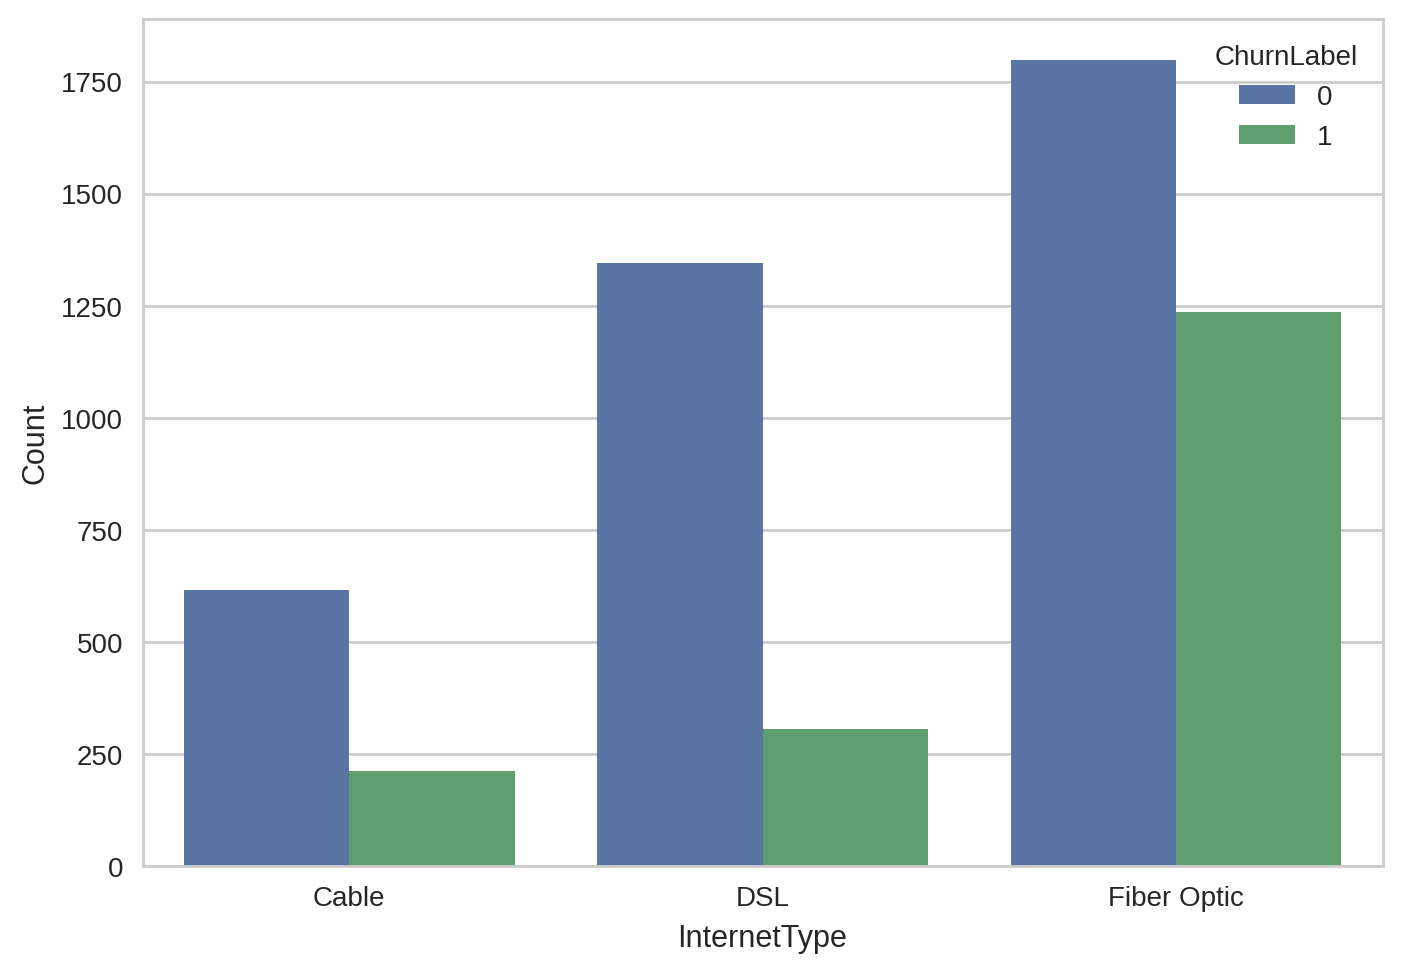

In [54]:
df = dfTelco.groupby(['InternetType', 'ChurnLabel']).size().rename('Count').reset_index()
sns.barplot(df, x='InternetType', y='Count', hue='ChurnLabel')

<Axes: xlabel='PaymentMethod', ylabel='Count'>

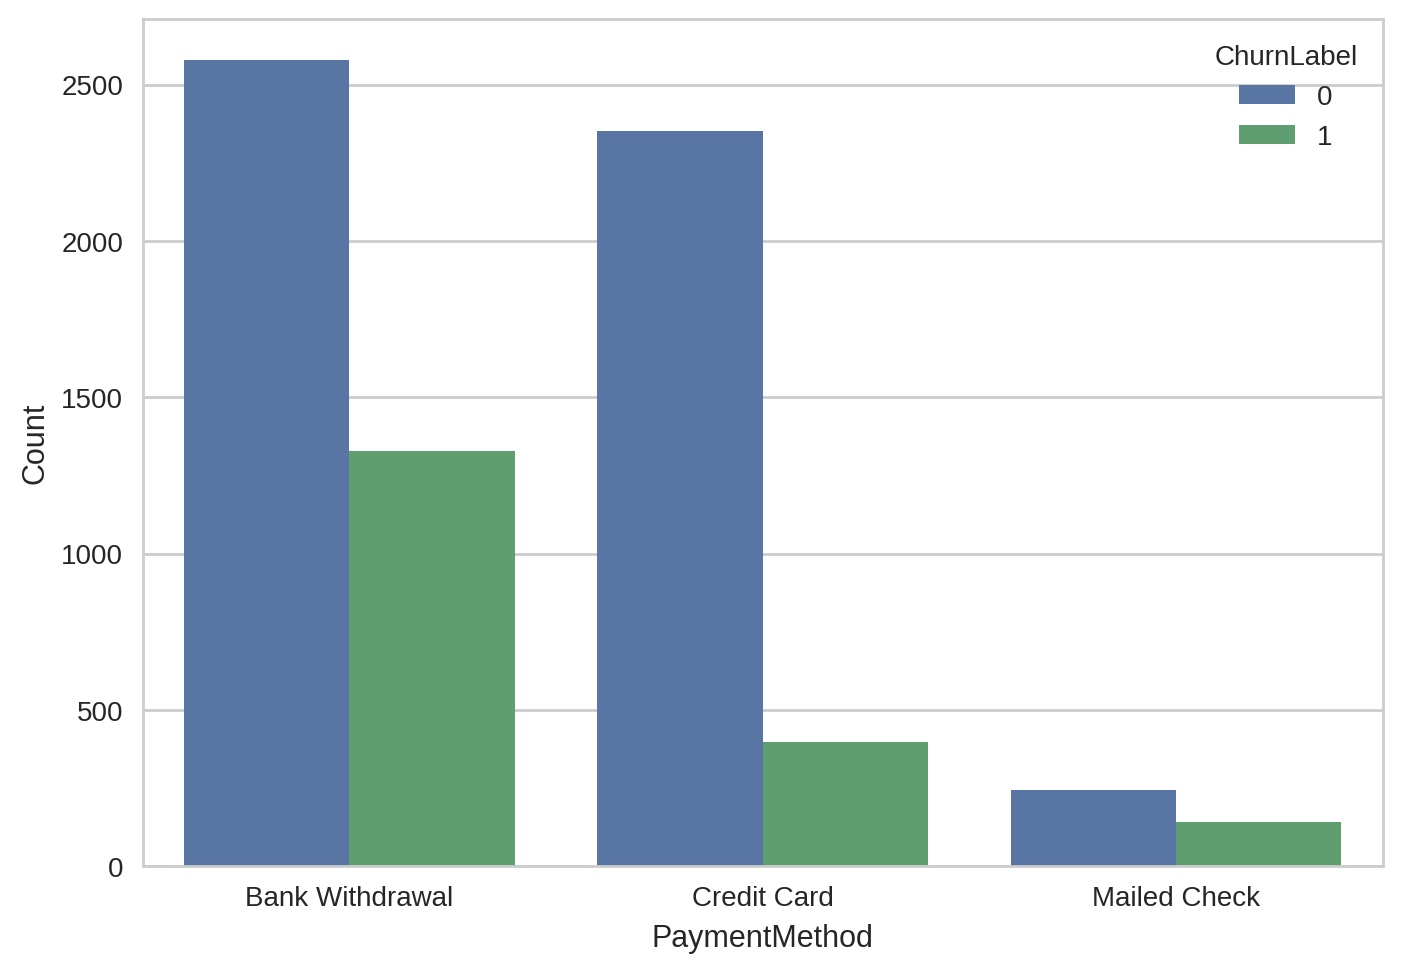

In [55]:
df = dfTelco.groupby(['PaymentMethod', 'ChurnLabel']).size().rename('Count').reset_index()
sns.barplot(df, x='PaymentMethod', y='Count', hue='ChurnLabel')

<Axes: xlabel='SatisfactionScore', ylabel='Count'>

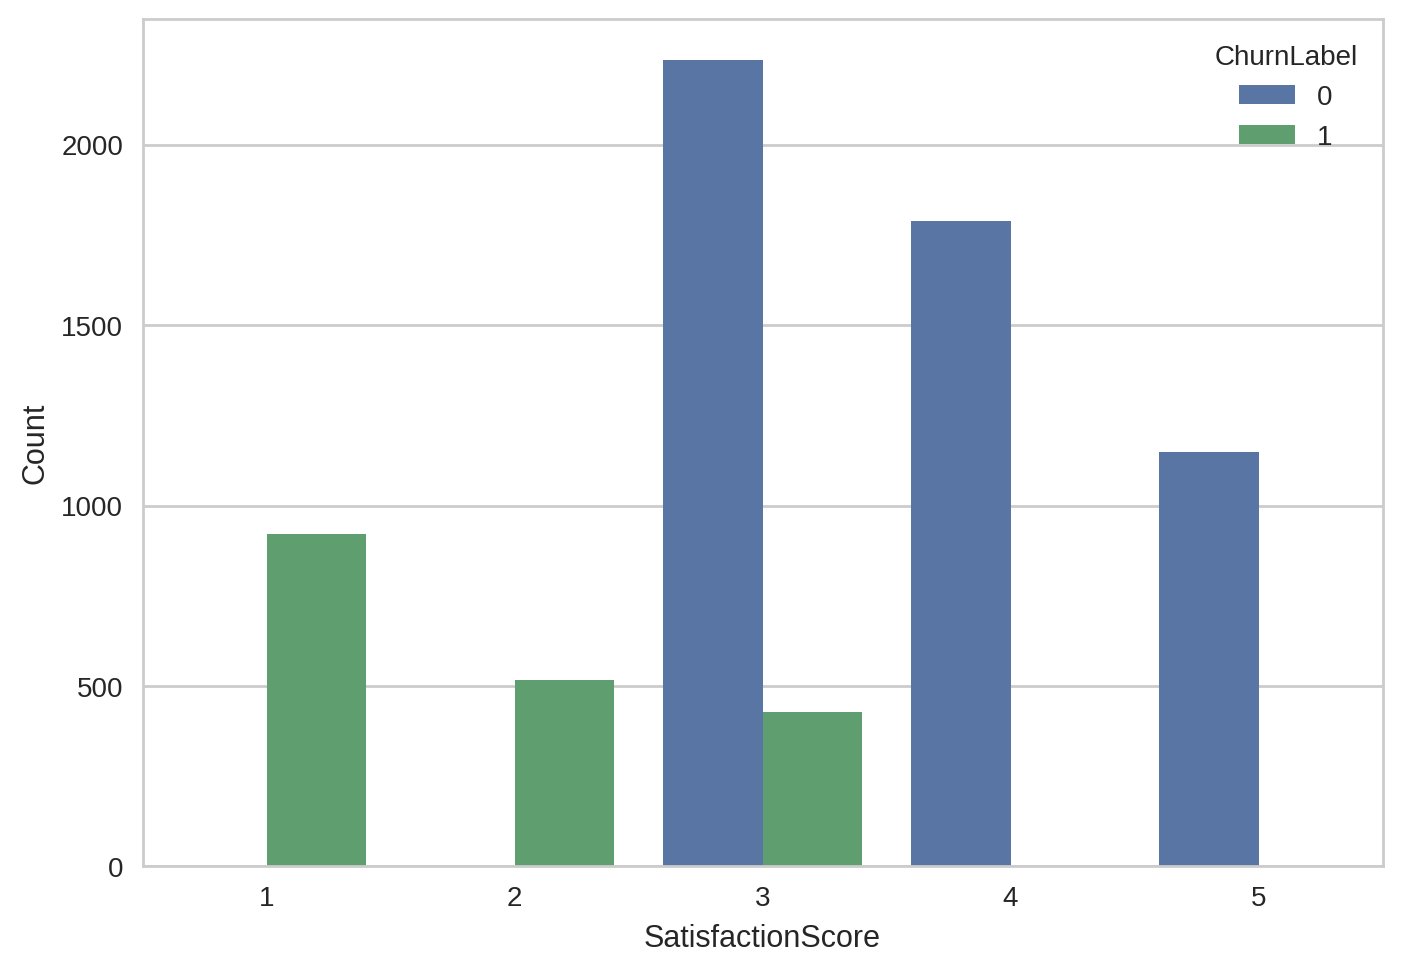

In [56]:
df = dfTelco.groupby(['SatisfactionScore', 'ChurnLabel']).size().rename('Count').reset_index()
sns.barplot(df, x='SatisfactionScore', y='Count', hue='ChurnLabel')

## 5.2. Churn reason
Most churned customers are attracted by competitor. Since there are so many churn categories, we use a technique called Decision Tree to classify if a customer churn by a specific reason. Findings:
- Not only `dissatisfaction` category has low satisfaction score, but also `competitor` does.
- Customers with low satisfaction score and low tenure is very likely to churn by competitor. This category also contributes high monthly revenue.
- Customers churned by `price` has much less refunds than other groups.


In [57]:
dfTelco[['ChurnCategory']].value_counts(normalize=True).rename('Percentage').to_frame().style.format('{:.1%}')

,Percentage
ChurnCategory,
Competitor,45.0%
Attitude,16.8%
Dissatisfaction,16.2%
Price,11.3%
Other,10.7%


In [58]:
dfTelco.groupby('ChurnCategory').agg({
    'SatisfactionScore': [np.mean, np.median],
    'AvgMonthlyRefunds': [np.mean],
    'MonthlyCharge': [np.mean, np.median, np.std],
    'AvgMonthlyRevenue': [np.mean, np.median, np.std],
})

<ipython-input-58-fdd9b4cdc338>:1: FutureWarning:

The provided callable <function mean at 0x7b3fc9f21b20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-58-fdd9b4cdc338>:1: FutureWarning:

The provided callable <function median at 0x7b3fc7366200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

<ipython-input-58-fdd9b4cdc338>:1: FutureWarning:

The provided callable <function mean at 0x7b3fc9f21b20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-58-fdd9b4cdc338>:1: FutureWarning:

The provided callable <function std at 0x7b3fc9f21c60> is currently using SeriesGroupBy.std. In a futur

SatisfactionScore        AvgMonthlyRefunds MonthlyCharge  \
                             mean median              mean          mean   
ChurnCategory                                                              
Attitude                 2.041401    2.0          0.140888     70.941561   
Competitor               1.546968    1.0          0.142648     76.728597   
Dissatisfaction          1.709571    1.0          0.160817     74.205281   
Other                    2.005000    2.0          0.060298     75.455500   
Price                    1.819905    2.0          0.095161     69.910664   

                                  AvgMonthlyRevenue                         
                median        std              mean      median        std  
ChurnCategory                                                               
Attitude         78.95  27.830919         94.416458   99.720614  33.956290  
Competitor       80.45  22.645658        101.339013  107.337500  31.671894  
Dissatisfaction  79.25  23.719675         97.122538  102.484286  32.071325  
Other            78.80  22.389042         97.866928  101.305000  30.095958  
Price            78.45  29.345435         94.342307  101.711923  35.339645